In [1]:
merge_functional = False # Whether to merge Functional comments into one class
n_gram = 1  # here we chose [1, 2, 3] for [unigrams, bigrams, trigrams]
l_penalty = 'l2' # we can choose between l1 and l2 for logistic regression and SVM
# l1 trenutno zeza za SVM treba da se promeni loss funkcija nekako
param_min_df = 1
param_max_df = 1.0
use_stemmer = True
use_td_idf = False
remove_special_chars = True
use_lowercase = False

In [2]:
import pandas as pd 
import numpy as np
import re

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def create_common_df(id_):
    try:
        cols = ['NaturalLanguageID', 'ProgrammingLanguageName', 'RepoID', 'SourceID', 'CommentID', 'comment', 'label']
        df = pd.read_csv('Data\\Common\\OutDataCommon{}.txt'.format(id_), sep='\t', lineterminator='\r', header=None)
        df.columns = cols
        df = df.drop(['NaturalLanguageID', 'ProgrammingLanguageName', 'RepoID', 'SourceID', 'CommentID'],axis=1)
        return df
    except:
        with open('Data\\Common\OutDataCommon{}.txt'.format(id_), "r", encoding="utf-8",  newline="\r\n") as source:
            for line in source:
                line = line.replace("\n", "")
                part = line.split("\t")
                if len(part) != 7:
                    print('POPRAVITI .TXT')
                    print(part)

In [5]:
df1 = create_common_df(1)
df2 = create_common_df(2)
df3 = create_common_df(3)
df4 = create_common_df(4)

In [6]:
df4.shape

(557, 2)

In [7]:
pd.set_option('display.max_rows', 10)

In [8]:
merged = df1.merge(df2, how='left', on='comment', suffixes=('_1', '_2')).merge(df3, how='left', on='comment').merge(df4, how='left', on='comment')

In [9]:
cols = merged.columns.values
cols[3] = 'label_3'
cols[4] = 'label_4'
merged.columns = cols

In [10]:
merged.drop_duplicates(subset ="comment", keep = False, inplace = True)
merged = merged.dropna()
merged = merged.reset_index(drop=True)

In [11]:
hits = np.zeros((merged.shape[0],6))

for i in range(merged.shape[0]):
    if merged.loc[i]['label_1'] == merged.loc[i]['label_2']:
        hits[i][0] += 1
    if merged.loc[i]['label_1'] == merged.loc[i]['label_3']:
        hits[i][1] += 1
    if merged.loc[i]['label_1'] == merged.loc[i]['label_4']:
        hits[i][2] += 1
    if merged.loc[i]['label_2'] == merged.loc[i]['label_3']:
        hits[i][3] += 1
    if merged.loc[i]['label_2'] == merged.loc[i]['label_4']:
        hits[i][4] += 1
    if merged.loc[i]['label_3'] == merged.loc[i]['label_4']:
        hits[i][5] += 1

In [12]:
all_same = 0
three_same_one_diff = 0
two_same_two_diff = 0
two_same_one_diff_one_diff = 0
all_diff = 0

for i in range(hits.shape[0]):
    if hits[i].sum() == 6:
        all_same += 1 
    if hits[i].sum() == 3:
        three_same_one_diff += 1
    if hits[i].sum() == 2:
        two_same_two_diff += 1
        
    if hits[i].sum() == 1:
        two_same_one_diff_one_diff += 1
    if hits[i].sum() == 0:
        all_diff += 1

In [13]:
print('All same: ', all_same)
print('Three same, one different: ', three_same_one_diff)
print('Two same, two different (same to one another): ', two_same_two_diff)
print('Two same, two different (different from one another): ', two_same_one_diff_one_diff)
print('All different: ', all_diff)
print('Total comments: ', merged.shape[0])

All same:  354
Three same, one different:  95
Two same, two different (same to one another):  12
Two same, two different (different from one another):  14
All different:  1
Total comments:  476


In [14]:
print('All same (%): ', round(all_same/merged.shape[0]*100))
print('Three same, one different (%): ',  round(three_same_one_diff/merged.shape[0]*100))
print('Two same, two different (same to one another) (%): ',  round(two_same_two_diff/merged.shape[0]*100))
print('Two same, two different (different from one another) (%): ',  round(two_same_one_diff_one_diff/merged.shape[0]*100))
print('All different (%): ',  round(all_diff/merged.shape[0]*100))

All same (%):  74
Three same, one different (%):  20
Two same, two different (same to one another) (%):  3
Two same, two different (different from one another) (%):  3
All different (%):  0


In [15]:
print('Procenat podudarnosti izmedju Laze i Matije: ', round(hits[:,0].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Laze i Mateje: ', round(hits[:,1].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Laze i Munje: ', round(hits[:,2].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Matije i Mateje: ', round(hits[:,3].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Matije i Ivane: ', round(hits[:,4].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Mateje i Ivane: ', round(hits[:,5].sum()/merged.shape[0]*100))

Procenat podudarnosti izmedju Laze i Matije:  87.0
Procenat podudarnosti izmedju Laze i Mateje:  93.0
Procenat podudarnosti izmedju Laze i Munje:  83.0
Procenat podudarnosti izmedju Matije i Mateje:  89.0
Procenat podudarnosti izmedju Matije i Ivane:  78.0
Procenat podudarnosti izmedju Mateje i Ivane:  83.0


## Ucitavanje svih podataka

In [16]:
def create_df():
    for id_ in range(1,5):
        try:
            cols = ['NaturalLanguageID', 'ProgrammingLanguageName', 'RepoID', 'SourceID', 'CommentID', 'comment', 'label']
            df = pd.read_csv('Data\\All data\\OutData{}.txt'.format(id_), sep='\t', lineterminator='\r', header=None)
            df.columns = cols
            if id_ == 1:
                dfs = df
            else:
                dfs = pd.concat([dfs,df], ignore_index=True)
        except:
            with open('Data\\All data\\OutData{}.txt'.format(id_), "r", encoding="utf-8",  newline="\r\n") as source:
                for line in source:
                    line = line.replace("\n", "")
                    part = line.split("\t")
                    if len(part) != 7:
                        print('POPRAVITI .TXT')
                        print(part)
    return dfs

In [17]:
df = create_df()

In [18]:
# df = pd.concat([df, df_common], ignore_index=True)

In [19]:
df = df.dropna()

In [20]:
df.shape

(6491, 7)

In [21]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispisujemo poruku da je drajver loadovan \n,Functional-Inline
1,\nSR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis država za uneseni kontinent \n,Functional-Inline
2,\nSR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Slanje upute \n,Functional-Inline
3,\nSR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis gradova koji pocinju odreðenim slovom \n,Functional-Inline
4,\nSR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Hvatalica grešaka \n,Functional-Inline
...,...,...,...,...,...,...,...
6486,\nSR,Java,Projekat-master,src\contoller\Controller.java,Projekat-master/src\contoller\Controller.java/69,Dodavanje OpenGeneralTourListener TuraGui-ju \n,Functional-Inline
6487,\nSR,Java,raspored-master,src\org\svetovid\raspored\cmd\Main.java,raspored-master/src\org\svetovid\raspored\cmd\...,Grupisanje \n,Functional-Inline
6488,\nEN/SR,Java,raspored-master,src\org\svetovid\raspored\model\Tip.java,raspored-master/src\org\svetovid\raspored\mode...,\n * Copyright 2018 Ivan Pribela \n * \n * Li...,General
6489,\nSR,Java,RAUM-master,funkcija.java,RAUM-master/funkcija.java/260,"Ako posle unarnog operanda sledi ""("", za podfu...",Functional-Inline


In [22]:
for i in range(df.shape[0]):
    if df['NaturalLanguageID'][i][0] == '\n':
        df['NaturalLanguageID'][i] = df['NaturalLanguageID'][i][1:]

In [23]:
df.loc[df['NaturalLanguageID'] == 'UNDEF'].shape

(104, 7)

In [24]:
df = df.drop(df.loc[df['NaturalLanguageID'] == 'UNDEF'].index)

In [25]:
df.shape

(6387, 7)

In [26]:
df = df.reset_index(drop=True)

In [27]:
df.shape

(6387, 7)

In [28]:
df.loc[df['NaturalLanguageID'] == 'EN/SR'].shape

(448, 7)

In [29]:
droped_duplicates = df.drop_duplicates(['comment'])

In [30]:
df.shape

(6387, 7)

In [31]:
droped_duplicates.shape

(4773, 7)

In [32]:
# This is for the case we want to use Functional for all comments

if merge_functional:
    for i in range(df.shape[0]):
        df.loc[i]['label'] = re.sub('-Inline', '', df['label'][i])
        df.loc[i]['label'] = re.sub('-Method', '', df['label'][i])
        df.loc[i]['label'] = re.sub('-Module', '', df['label'][i])


In [33]:
df.shape

(6387, 7)

In [34]:
pd.set_option('display.max_rows', 10)

In [35]:
df.loc[df.duplicated('comment', keep=False)].sort_values('comment').shape

(2180, 7)

In [36]:
droped_duplicates[droped_duplicates.index == 3676]

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label


In [37]:
df = df.drop_duplicates(['comment'])
df = df.reset_index(drop=True)

In [38]:
df = df.drop(df[df['comment'].str.contains('NON')].index)

In [39]:
df['label'].value_counts()

Functional-Inline    2804
Functional-Method    1076
Functional-Module     504
Notice                155
Code                  109
General                69
ToDo                   34
IDE                    20
Name: label, dtype: int64

In [40]:
df[df['label'] == 'Notice'].shape

(155, 7)

In [41]:
df[df['label'] == 'General'].shape

(69, 7)

In [42]:
df.loc[df.index == 2044]['comment'][2044]

' ov specificne metode mozda izbaciti i ostaviti samo opstem a uscitavanje rditi sa kastovanjem s \\n '

In [43]:
df = df.drop(df[df.comment.apply(lambda x: len(str(x)) < 6)].index)

In [44]:
df.shape

(4733, 7)

In [45]:
df = df.reset_index(drop=True)

Preprocessing all comments

In [46]:
for i in range(df.shape[0]):
    # pretvaranje celog teksta u mala slova
    if use_lowercase:
        df.loc[i]['comment'] = df.loc[i]['comment'].lower()
    # izbacivanje special character-a
    if remove_special_chars:
        df['comment'][i] = re.sub(r'\W', ' ', df['comment'][i])
        # izbacivanje new line oznake
        df['comment'][i] = re.sub(r'\b[n]\b', '', df['comment'][i])
        # zamena vise razmaka s jednim razmakom
        df['comment'][i] = re.sub(r'\s+', ' ', df['comment'][i], flags=re.I)

In [47]:
for i in range(10):
    print(df['comment'][i])

 Ispisujemo poruku da je drajver loadovan 
 Ispis država za uneseni kontinent 
 Slanje upute 
 Ispis gradova koji pocinju odreðenim slovom 
 Hvatalica grešaka 
 konstruktor sa data fields 
 guest button 
 ok button za login admin 
 zatvaranje pregleda racuna 
 button za pregled racuna za datog korisnika 


In [48]:
df.shape

(4733, 7)

## ML 

In [49]:
df['comment'].values

array([' Ispisujemo poruku da je drajver loadovan ',
       ' Ispis država za uneseni kontinent ', ' Slanje upute ', ...,
       ' Grupisanje ',
       'Ako posle unarnog operanda sledi za podfunkciju uzimam sve sto je u zagradi ',
       ' Dužina u karakterima najdužeg sufiksnog pravila p i Length in characters of the longest suffix rule i '],
      dtype=object)

In [50]:
df.label.value_counts()

Functional-Inline    2771
Functional-Method    1076
Functional-Module     504
Notice                151
Code                  109
General                69
ToDo                   33
IDE                    20
Name: label, dtype: int64

In [51]:
df['label'].values

array(['Functional-Inline', 'Functional-Inline', 'Functional-Inline', ...,
       'Functional-Inline', 'Functional-Inline', 'Functional-Inline'],
      dtype=object)

In [73]:
x = df['comment'].values
y = df['label'].values

In [74]:
# Pokrenuti ovo za koriscenje stemmovanja

import nltk
nltk.download('punkt')

import StemmerByNikola
from StemmerByNikola import stem_str

if use_stemmer:
    stemmed_x = []
    for doc in x:
        stemmed_x.append(stem_str(doc))
    
    x = np.array(stemmed_x)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mateja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
# Deo gde se radi obicna vektorizacija bez TF-IDF
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', # lowercase=True, # Menjanjem ovoga testiramo lowercase uticaj
                             ngram_range=(1, n_gram), # Podesavanjem ovoga testiramo bigramski i trigramski uticaj
                             min_df=param_min_df, max_df=param_max_df) # Podesavanjem ova dva testiracemo uticaj frekvencijskog filtriranja

vectorizer.fit(x)

x = vectorizer.transform(x)

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

if use_td_idf:
    tfidfconverter = TfidfTransformer()
    x = tfidfconverter.fit_transform(x).toarray()


In [56]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=151, shuffle=True)
kf.get_n_splits(x)


10

In [57]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline

def plot_confusion_matrix(y_test, y_pred):
    data = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 16})# font size

In [58]:
import warnings
warnings.filterwarnings('ignore')

## Logistic regression L penalty

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

accuracies = []
f1_scores = []

classifier = LogisticRegression(penalty=l_penalty)
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracies.append(classifier.score(X_test, y_test))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    
print("Logistic regression:")
print("Accuracy:", sum(accuracies)/len(accuracies))
print("F1 score:", sum(f1_scores)/len(f1_scores))

Logistic regression:
Accuracy: 0.823575631948167
F1 score: 0.5492322595380182


## Grid search for finding the optimal C value

In [60]:
from sklearn.model_selection import GridSearchCV

best_Cs = []
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    parameters = {'C':[5, 7, 10, 12, 15, 20]}
    log_reg = LogisticRegression(penalty=l_penalty)
    clf = GridSearchCV(log_reg, parameters, scoring='f1_macro')
    clf.fit(X_train, y_train)
    best_Cs.append(clf.best_params_['C'])

print("Logistic regression grid search - C parameter:")
print("The best Cs for each k-fold: ")
print(best_Cs)
print("Median:")
median_best_C = sorted(best_Cs)[int(len(best_Cs)/2)]
print(median_best_C)

Logistic regression grid search - C parameter:
The best Cs for each k-fold: 
[15, 5, 10, 15, 10, 12, 20, 20, 15, 7]
Median:
15


In [61]:
log_reg = LogisticRegression(penalty=l_penalty, C=median_best_C)
log_reg.fit(X_train, y_train)

LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Logistic regression (l=l2, C=15)
Accuracy: 0.5784568938079208
F1 score: 0.8086919540318214


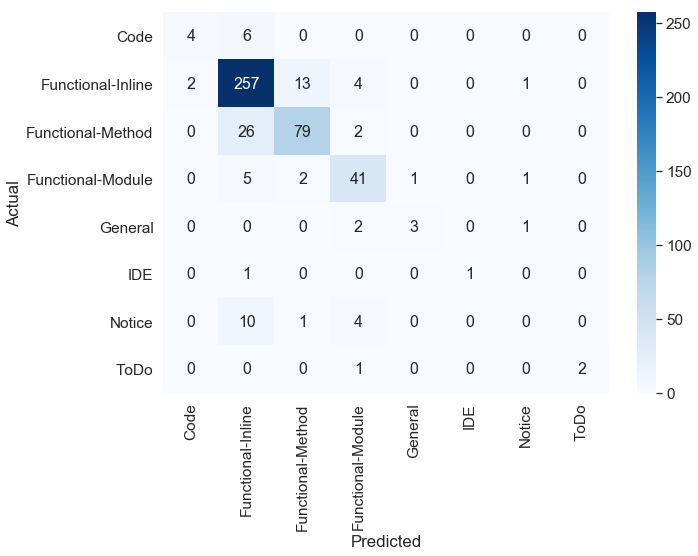

In [62]:
from sklearn.metrics import classification_report

y_true, y_pred = y_test, log_reg.predict(X_test)
# clf_report = classification_report(y_true, y_pred)
# print(classification_report(y_true, y_pred))
print("Logistic regression (l=" + l_penalty + ", C=" + str(median_best_C) + ")")
print("Accuracy:", clf.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
plot_confusion_matrix(y_test, y_pred)

## Multinomial Naive Bayes Classifier

Multinomial Naive Bayes Classifier
Accuracy: 0.7711532382062016
F1 score: 0.5494521306180513


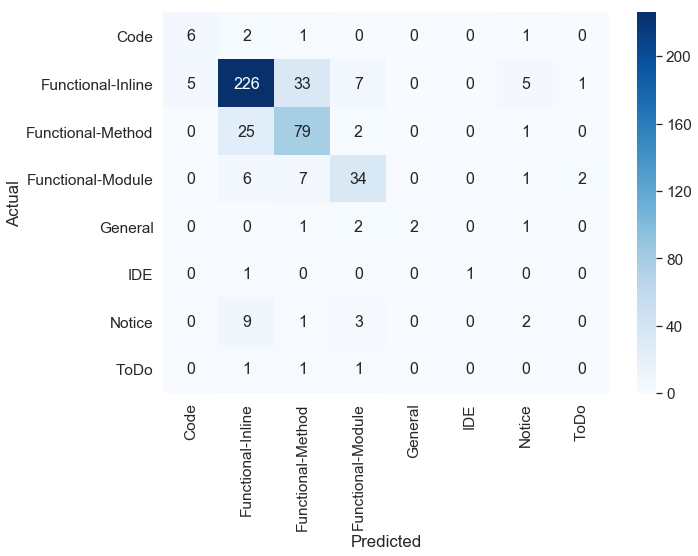

In [63]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB

accuracies = []
f1_scores = []

classifier = MultinomialNB()
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracies.append(classifier.score(X_test, y_test))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    
print("Multinomial Naive Bayes Classifier")
print("Accuracy:", sum(accuracies)/len(accuracies))
print("F1 score:", sum(f1_scores)/len(f1_scores))
plot_confusion_matrix(y_test, y_pred)

## Bernoulli Naive Bayes Classifier

Bernoulli Naive Bayes Classifier
Accuracy: 0.7320863246470823
F1 score: 0.2549798241035279


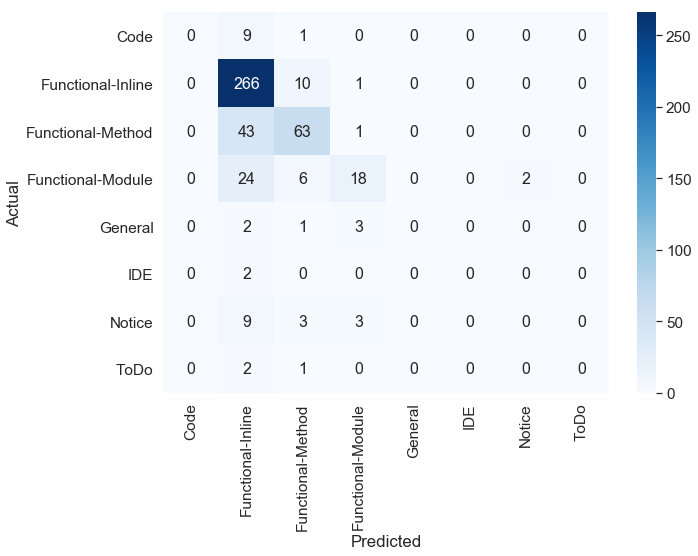

In [64]:
from sklearn.naive_bayes import BernoulliNB

accuracies = []
f1_scores = []

classifier = BernoulliNB()
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracies.append(classifier.score(X_test, y_test))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    
print("Bernoulli Naive Bayes Classifier")
print("Accuracy:", sum(accuracies)/len(accuracies))
print("F1 score:", sum(f1_scores)/len(f1_scores))
plot_confusion_matrix(y_test, y_pred)

## Support Vector Machine

Support Vector Machine
Accuracy: 0.8191116579719064
F1 score: 0.604571440338703


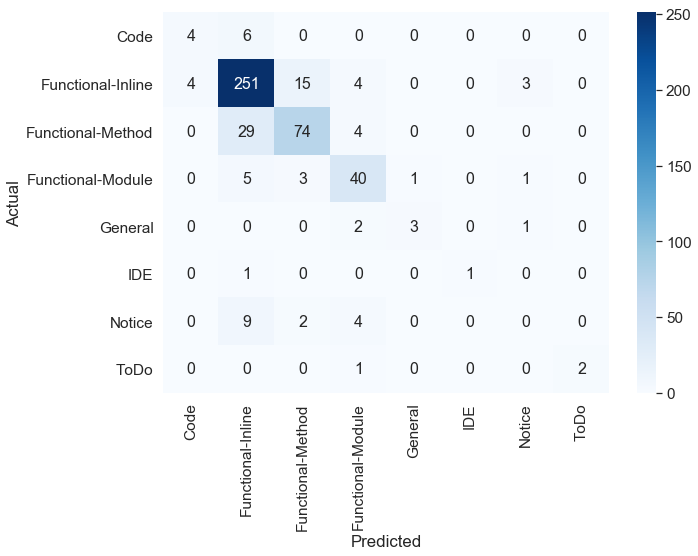

In [65]:
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

# clf = LinearSVC(penalty=l_penalty)
# clf.fit(X_train, y_train)

accuracies = []
f1_scores = []

classifier = LinearSVC(penalty=l_penalty)
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracies.append(classifier.score(X_test, y_test))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

print("Support Vector Machine")
print("Accuracy:", sum(accuracies)/len(accuracies))
print("F1 score:", sum(f1_scores)/len(f1_scores))
plot_confusion_matrix(y_test, y_pred)

In [68]:
import warnings
warnings.filterwarnings('ignore')

best_Cs = []
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    parameters = {'C':[0.1, 0.2, 0.3, 0.5, 1, 3, 5, 10]}
    svm = LinearSVC(penalty=l_penalty)
    clf = GridSearchCV(svm, parameters, scoring='f1_macro')
    clf.fit(X_train, y_train)
    best_Cs.append(clf.best_params_['C'])

    
print("The best Cs for each k-fold: ")
print(best_Cs)
print("Median of those:")
median_best_C = sorted(best_Cs)[int(len(best_Cs)/2)]
print(median_best_C)

The best Cs for each k-fold: 
[0.5, 0.3, 0.5, 0.5, 0.5, 0.3, 0.3, 0.5, 0.5, 0.5]
Median of those:
0.5


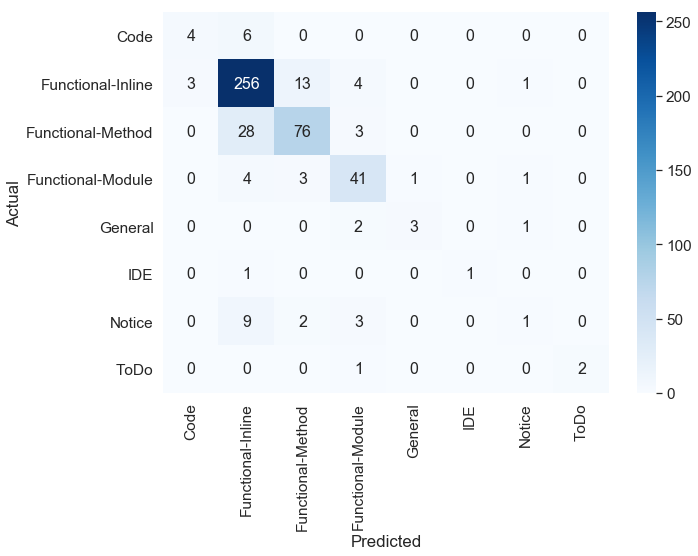

In [67]:
svm = LinearSVC(penalty=l_penalty, C=median_best_C)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
plot_confusion_matrix(y_true, y_pred)